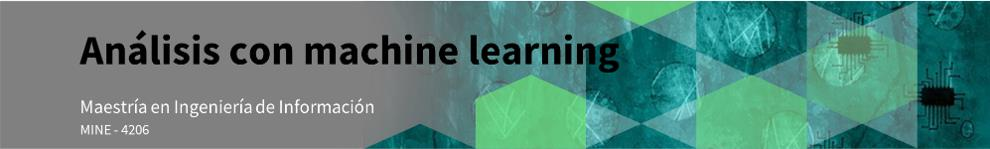

- **Integrante 1:** Santiago Martínez Novoa - 202112020

---
# Contexto y objetivos.

En la actualidad, la cantidad de artículos publicados en Internet está generando una gran ola de información accesible por cualquier usuario, dando a conocer diferentes puntos de vista, opiniones, información e investigaciones sobre diferentes temas de interés.

Esta gran cantidad de información no solo permite una búsqueda exhaustiva sobre un tema, también permite realizar un análisis sobre la tendencia de los diferentes temas que estén dando de qué hablar en una sociedad. Es por ello que un grupo de expertos se ha dado la tarea de analizar 10.000 artículos web y clasificarlos para poder establecer un análisis de los temas en la actualidad.

Para ello, como experto en análisis con machine learning, le han pedido que construya un modelo capaz de clasificar los nuevos artículos, realice un análisis de cuáles son los temas que dan de que hablar y automatice el proceso de selección y búsqueda de diferentes artículos.

**Objetivos de desarrollo**:

* Realizar el análisis y limpieza de textos.
* Explorar las diferentes técnicas de transformación de datos no estructurados.
* Establecer el mejor modelo basado en una red neuronal.

**Datos**: La fuente de los datos la puedes encontrar en [News Articles Classification Dataset for NLP & ML](https://www.kaggle.com/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml).

# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **headlines** | Titular del artículo.|
| **description** | Reseña del artículo.|
| **content** | Contenido del artículo.|
| **url** | Dirección web del artículo.|
| **category** | Representa la temática del artículo.|

# Actividades a realizar.

1. Realizar el análisis exploratorio de componentes principales en la información.

2. Identificar el número de componentes principales apropiado el procesamiento. Genera una tabla comparativa y los gráficos que apoyen este proceso. Recuerda que no deben truncarse los textos. Por último, la elección del número de componentes debe estar debidamente justificada.

3. Construir la red neuronal tomando como insumo los componentes principales procesados en el punto anterior.

4. Construir las gráficas de entrenamiento, validación. Debes interpretar los resultados obtenidos para este modelo base.

5. Realizar la identificación de hiperparámetros, justificando la elección de los valores correspondientes.

**NOTA**: La calificación será sobre notebook ejecutado y cargado en Bloque Neón junto con el archivo HTML.

# Estado GPU

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Apr 14 12:12:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:2B:00.0  On |                  N/A |
| 23%   38C    P5              16W /  75W |   1410MiB /  4096MiB |     27%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 0. Importación de librerías


In [2]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=a096c7cf2f2e69731073480fc7f3ad908fda0e13f73c12a150bb3460ed41be70
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [3]:
!pip install kaggle

In [4]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [5]:
!pip install spacy

In [6]:
#Librerías para identificación de idiomas
!pip install polyglot
!pip install PyICU
!pip install pycld2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52561 sha256=145bf05131cc89b5d42b633a1b3feec07601fc9f79ebf1a7a5c1a4b9e045a8c5
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.0/260.0 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyICU: filename=PyICU-2.12-cp310-cp310-linux_x86_64.whl size=1754545 sha256=ebe5f86aad3f8cfb6f3ef19bc0b43a60302a246099b645063d21237407487280
  Stored in directory: /root/.cache/pip/wheels/74/60/95/66d97ac2fdc8be8e526c4254047405fe77feaf064282d1ad07
Successfully built PyICU
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 20.3 MB/s eta 

In [7]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.5 MB/s eta 0:00:00


# 1. Importación librerías

In [61]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay

#Textos
import contractions
import nltk
import inflect
import re, string, unicodedata
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

#Tensorflow y keras
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

#Sistema operativo
import os
import os.path as osp

#Librerías extras
import itertools
from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")
print(f'La versión de Tensor Flow es:', tf.__version__)

La versión de sklearn es: 1.4.1.post1
La versión de Tensor Flow es: 2.16.1


Descarga de información de nltk

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]    | Do

True

# 2. Introducción a los datos

## 2.1. Parámetros generales y carga de información

In [5]:
#Porcentaje para validación y test
test_alpha = 0.2
#random_state o semilla para la reproducibilidad
my_seed = 19

## 2.2. Configuración del entorno de kaggle.

In [11]:
import os
import shutil

# Obtener la ruta del directorio del usuario
home_dir = os.path.expanduser("~")

# Crear el directorio .kaggle si no existe
kaggle_dir = os.path.join(home_dir, ".kaggle")
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Copiar el archivo kaggle.json al directorio .kaggle
src_file = "kaggle.json"
dst_file = os.path.join(kaggle_dir, src_file)
shutil.copy(src_file, dst_file)

# Cambiar los permisos del archivo kaggle.json para que solo el usuario tenga acceso de lectura
os.chmod(dst_file, 0o600)

print("Configuración de la API de Kaggle completada.")


Configuración de la API de Kaggle completada.


In [12]:
!kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                           Online Food Dataset                               3KB  2024-03-02 18:50:30          25427        500  0.9411765        
sukhmandeepsinghbrar/most-subscribed-youtube-channel          Most Subscribed YouTube Channel                   1KB  2024-04-10 20:33:05            897         31  1.0              
nbroad/gemma-rewrite-nbroad                                   gemma-rewrite-nbroad                              8MB  2024-03-03 04:52:39           1601        100  1.0              
sanyamgoyal401/customer-purchases-behaviour-dataset           Customer Purchases Behaviour

In [13]:
!kaggle datasets download banuprakashv/news-articles-classification-dataset-for-nlp-and-ml


  0%|          | 0.00/5.57M [00:00<?, ?B/s]
 18%|█▊        | 1.00M/5.57M [00:00<00:01, 2.79MB/s]
 72%|███████▏  | 4.00M/5.57M [00:00<00:00, 10.3MB/s]
100%|██████████| 5.57M/5.57M [00:00<00:00, 11.3MB/s]


In [43]:
ROOT_DIR ='C:\\Users\\user\\BI-Sabroson\\Machine-Learning-Labs\\Talleres del Santi\\Taller 3'
DATASET_NAME = 'news-articles-classification-dataset-for-nlp-and-ml'

In [44]:
print(f"!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}")

!unzip news-articles-classification-dataset-for-nlp-and-ml.zip -d C:\Users\user\BI-Sabroson\Machine-Learning-Labs\Talleres del Santi\Taller 3/news-articles-classification-dataset-for-nlp-and-ml


In [45]:
import zipfile
#imprimir directorio actual
print(os.getcwd())
# Cambiar al directorio ROOT_DIR
os.chdir(ROOT_DIR)

# Crear el directorio DATASET_NAME
dataset_dir = os.path.join(ROOT_DIR, DATASET_NAME)
os.makedirs(dataset_dir, exist_ok=True)

# Descomprimir el archivo DATASET_NAME.zip en el directorio DATASET_NAME
zip_file = os.path.join(ROOT_DIR, f"{DATASET_NAME}.zip")
with zipfile.ZipFile(f"{DATASET_NAME}.zip", 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print("Descompresión completada.")

c:\
Descompresión completada.


In [47]:
DATA_DIR = f"{ROOT_DIR}/{DATASET_NAME}"
print(DATA_DIR)

C:\Users\user\BI-Sabroson\Machine-Learning-Labs\Talleres del Santi\Taller 3/news-articles-classification-dataset-for-nlp-and-ml


## 2.3. Separación de la información

In [48]:
csv_files = os.listdir(DATA_DIR)

train_df = pd.DataFrame()
test_df = pd.DataFrame()

for csv_file in csv_files:
  new_df = pd.read_csv(osp.join(DATA_DIR, csv_file))
  train, test = train_test_split(new_df, test_size=test_alpha, random_state=my_seed)
  train_df = pd.concat([train_df, train])
  test_df = pd.concat([test_df, test])

train_df.head()

headlines  \
636  Gold Silver Rates Today: Precious metals price...   
161  India’s forex reserves jump USD 2.75 bn to USD...   
855  From capital to people, a lot at stake for Ind...   
24   Q3 Results: IOC, DLF, Bajaj Auto, TVS Motor re...   
252  India says IMF debt warning a worst case scenario   

                                           description  \
636  In Chennai, 24-carat gold per 10 gram was sell...   
161  Gold reserves were up by USD 853 million to US...   
855  Over 1,600 people have been killed so far sinc...   
24   Q3 Results: Most companies managed their perfo...   
252  The IMF, in a so-called article IV review, sai...   

                                               content  \
636  Gold Silver Rates Today (November 1): Precious...   
161  India’s forex reserves jumped by USD 2.759 bil...   
855  A wide range of Indian businesses are closely ...   
24   Investors will continue their focus on earning...   
252  The Indian government said on Friday a warning...   

                                                   url  category  
636  https://indianexpress.com/article/business/com...  business  
161  https://indianexpress.com/article/business/ind...  business  
855  https://indianexpress.com/article/business/fro...  business  
24   https://indianexpress.com/article/business/com...  business  
252  https://indianexpress.com/article/business/eco...  business

A continuación se muestra la separación de los datos en ambos sets de  entrenamiento y de evaluación.

In [49]:
train_count = train_df.shape[0]
test_count = test_df.shape[0]

print("-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------")
print(f"-> Train: {train_count:,}")
print(f"-> Test: {test_count:,}")

-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------
-> Train: 8,000
-> Test: 2,000


Como se puede observar, el dataset original parece contener 10000 datos, separados en una proporción 80% train y 20% test

### 2.3.1. Revisión de categorías

Es necesario revisar que tan balanceadas están las categorías tanto para los datos de entrenamiento como para los de evaluación.

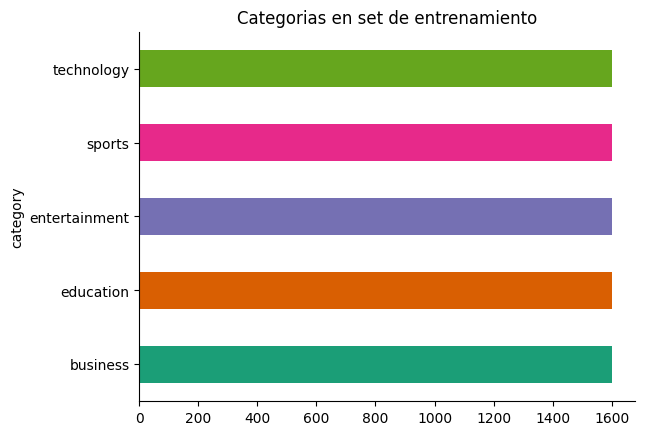

In [50]:
plt.title("Categorias en set de entrenamiento")
train_df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

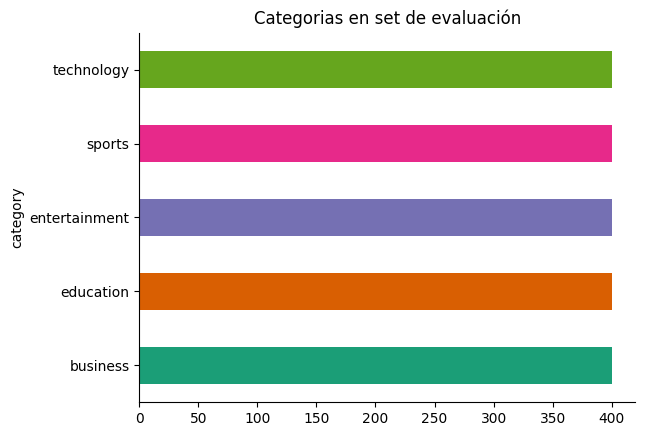

In [51]:
plt.title("Categorias en set de evaluación")
test_df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Luego de graficar ambos datasets es posible decir que en ambos casos las clases se encuentran balanceadas y que cuentan con 5 diferentes tipos de categorías: _tecnología, deportes, entretenimiento, educación y negocio._

Se definen las variables a utilizar para la red neuronal.

In [52]:
target_feature = 'category'
x_feature = 'content'

## 2.4. Exploración de los datos.

Se utilizará `WordCloud` para poder visualizar las palabras más recurrentes dentro de el conjunto de datos.

In [53]:
def show_wordcloud(palabras,stopwords=[]):
    comment_words = ''

    # iterate through the csv file
    for val in palabras:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

---------- Words for class: business ----------


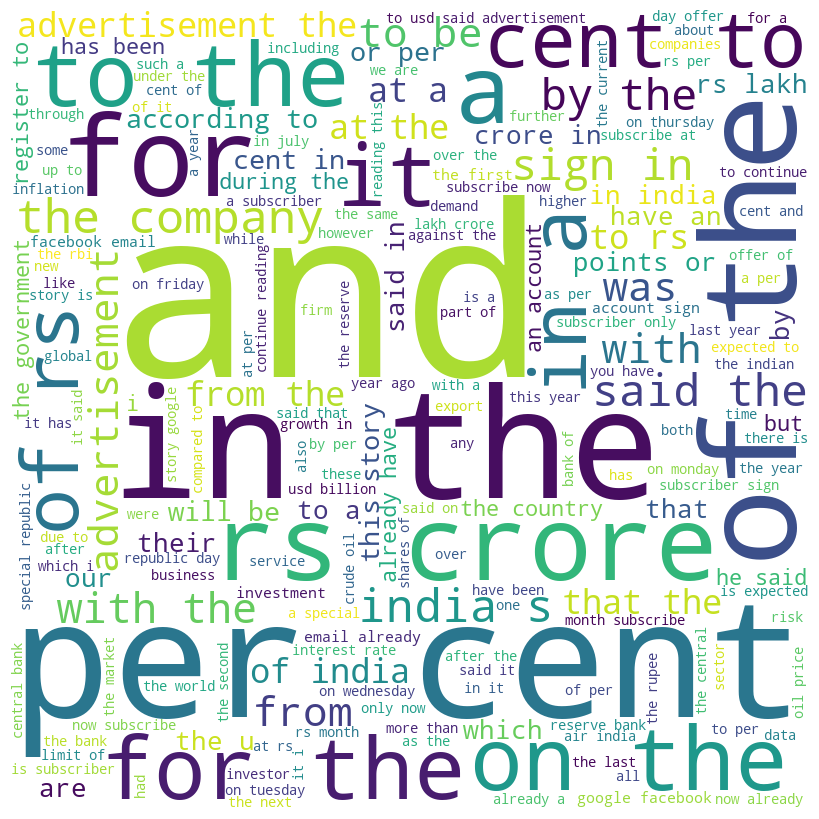

---------- Words for class: education ----------


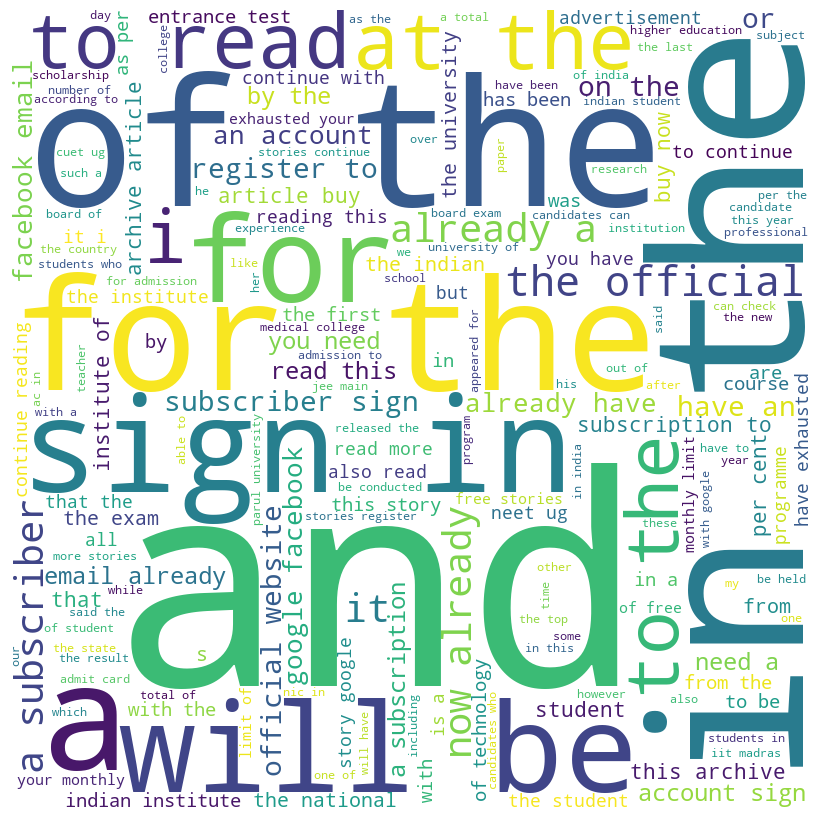

---------- Words for class: entertainment ----------


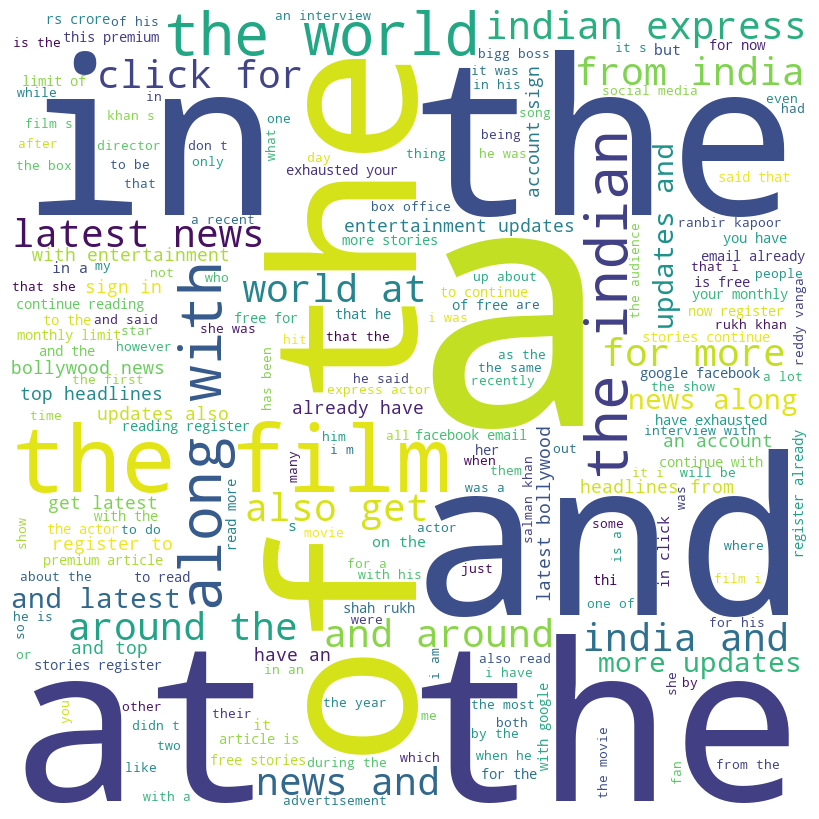

---------- Words for class: sports ----------


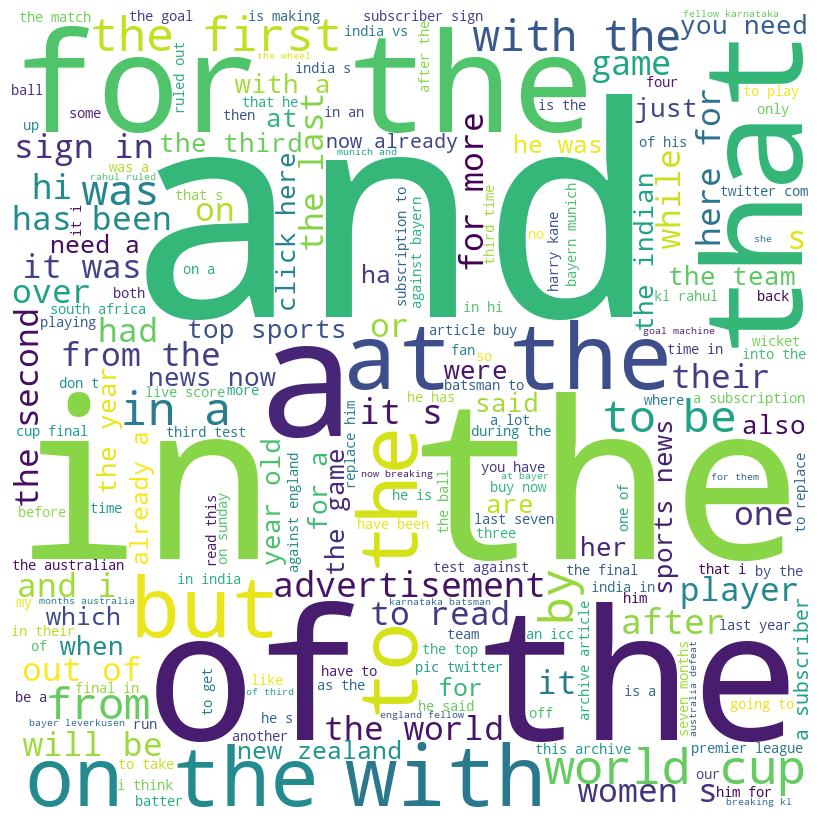

---------- Words for class: technology ----------


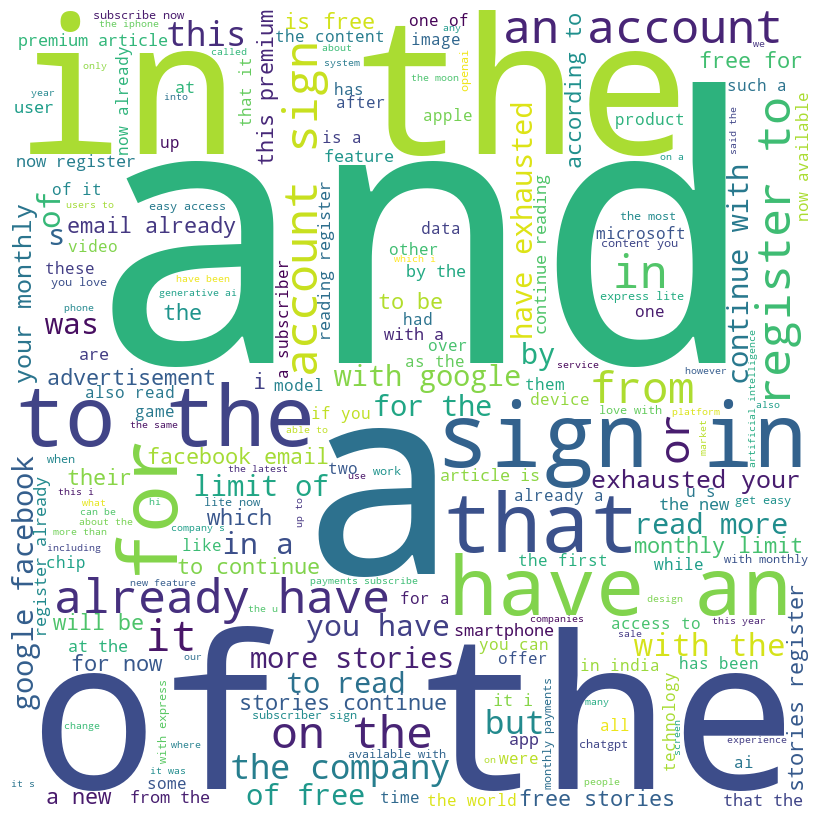

In [54]:
for i in train_df[target_feature].unique():
    print(f'---------- Words for class: {i} ----------')
    show_wordcloud(train_df.loc[train_df[target_feature]==i, x_feature])

Después de realizar la visualización de los datos, se evidencia la necesidad de eliminar las stopwords, palabras comunes que no añaden significado al análisis de texto. La librería NLTK provee herramientas para este fin, permitiendo filtrar palabras según una lista predefinida de stopwords. Esto mejora la calidad del análisis al enfocarse en palabras relevantes, como sustantivos y adjetivos, facilitando la extracción de información importante del texto.

Sin embargo, como las stopwords son altamente sensibles al idioma del texto que se va a tratar, hay que revisar que todos los datos se encuentren en inglés. 

`*Esto se revisó desde Google Colab pero tuvo que quitarse al pasarse a local debido a problemas con la librería Polyglot y que en Colab se acabaron los creditos para usar la GPU *`

Se confirma que todos los datos están en inglés y por lo tanto se pueden eliminar las stopwords con la seguridad de que será hecho de manera efectiva para el idioma inglés.

---------- Words for class: business ----------


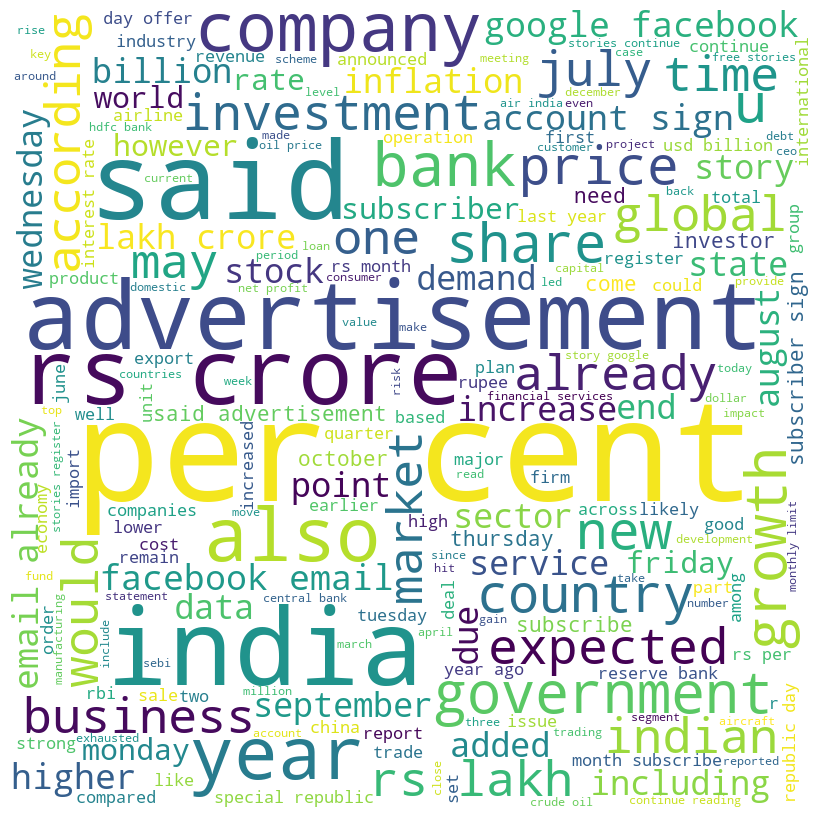

---------- Words for class: education ----------


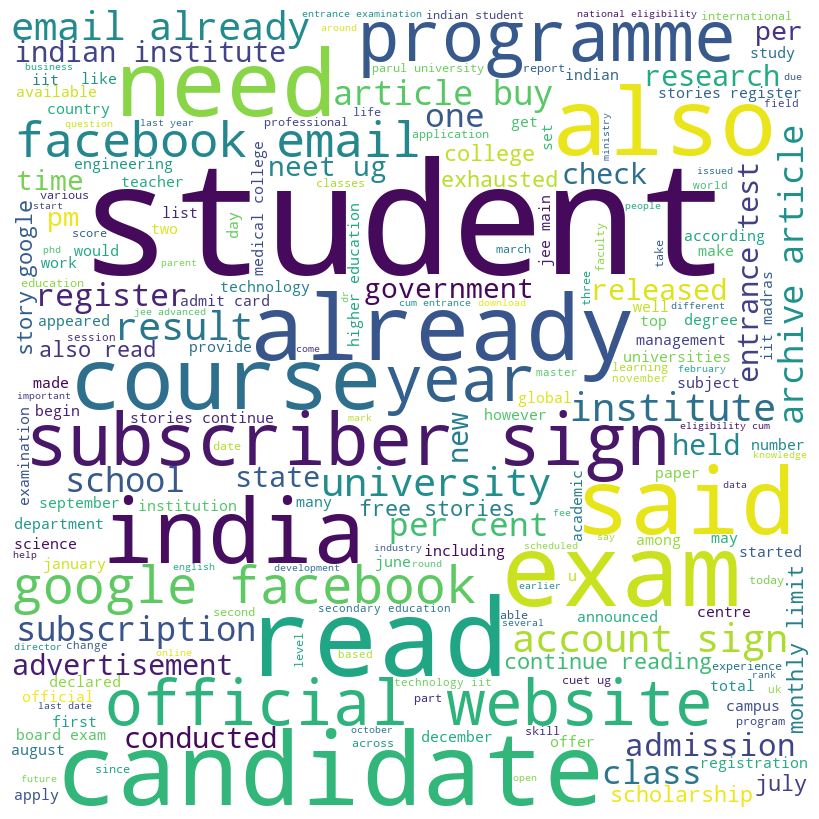

---------- Words for class: entertainment ----------


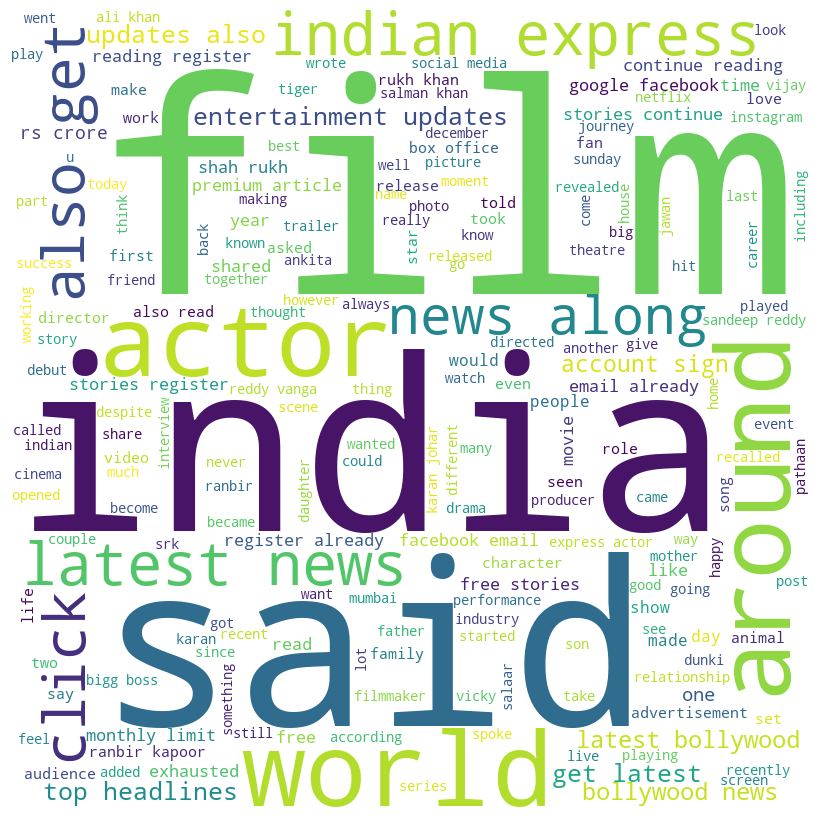

---------- Words for class: sports ----------


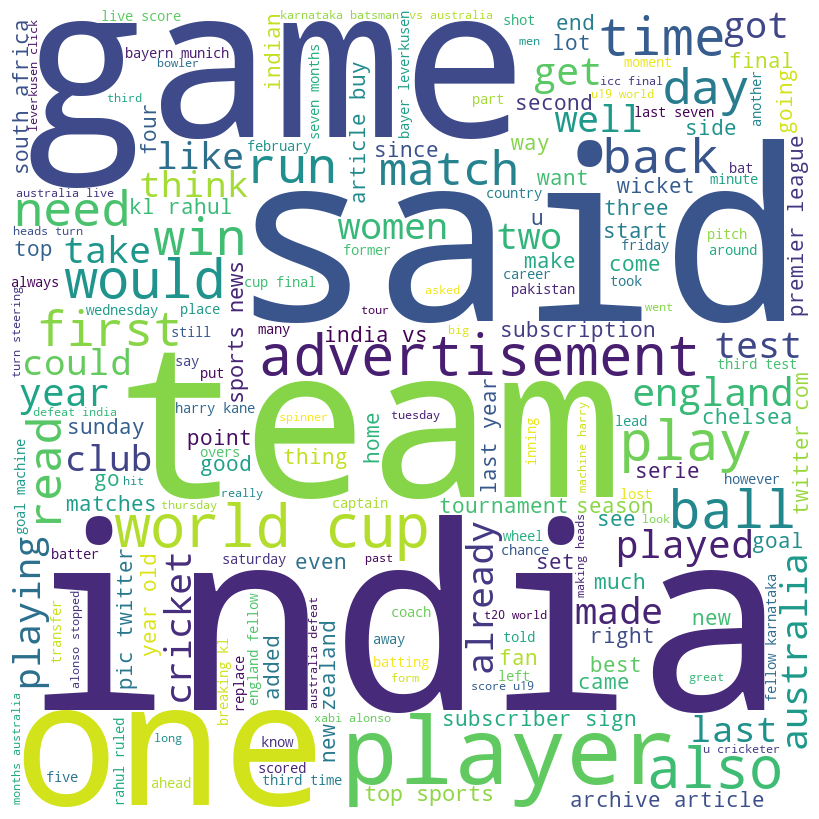

---------- Words for class: technology ----------


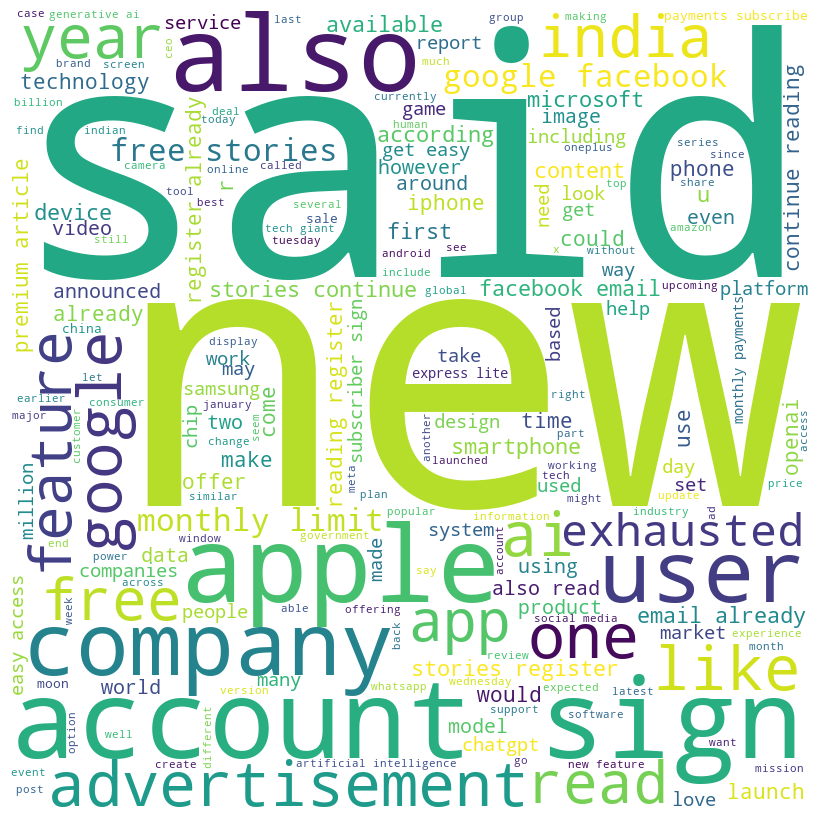

In [56]:
stop_words = stopwords.words('english')
for i in train_df[target_feature].unique():
    print(f'---------- Words for class: {i} ----------')
    show_wordcloud(train_df.loc[train_df[target_feature]==i, x_feature], stop_words)

## 2.5 Preparación de la información

Dentro del preprocesamiento de los datos se han decidido realizar las siguientes cuatro acciones:

1. Codificación de las temáticas.
2. Eliminación de ruido
3. Tokenización
4. Normalización

 Estas transformaciones permiten que los datos queden en un formato estructurado y listo para ser procesados por la red neuronal, cumpliendo con estándares de calidad como la completitud, la consistencia, la exactitud y la relevancia. Además, estas acciones facilitan el aprendizaje de la red neuronal, mejoran la precisión, reducen el tiempo de entrenamiento y aumentan la generalización, lo que se traduce en un mejor rendimiento y una mayor confiabilidad del modelo de aprendizaje automático.

### 2.5.1. Codificación de las temáticas


Es crucial que las categorías se representen de manera numérica en análisis de datos y aprendizaje automático, ya que muchos algoritmos requieren datos numéricos para operar de manera efectiva. Cuando las categorías están en formato no numérico, como texto o cadenas, es necesario transformarlas a valores numéricos para poder utilizarlas en modelos predictivos. Esta transformación es esencial para garantizar que el modelo pueda interpretar y aprender de los datos correctamente.

In [57]:
label_encoder = LabelEncoder()
train_df[target_feature] = label_encoder.fit_transform(train_df[target_feature])
test_df[target_feature] = label_encoder.fit_transform(test_df[target_feature])

unique_labels = label_encoder.classes_
for num_value, original_label in enumerate(unique_labels):
    print(f'Valor numérico: {num_value}, Etiqueta original: {original_label}')

Valor numérico: 0, Etiqueta original: business
Valor numérico: 1, Etiqueta original: education
Valor numérico: 2, Etiqueta original: entertainment
Valor numérico: 3, Etiqueta original: sports
Valor numérico: 4, Etiqueta original: technology


#### Separación de Variable objetivo y contenido

In [58]:
X_train, Y_train = train_df[x_feature], train_df[target_feature]
X_test, Y_test = test_df[x_feature], test_df[target_feature]
display(X_train)
Y_train

636     Gold Silver Rates Today (November 1): Precious...
161     India’s forex reserves jumped by USD 2.759 bil...
855     A wide range of Indian businesses are closely ...
24      Investors will continue their focus on earning...
252     The Indian government said on Friday a warning...
                              ...                        
936     Apart from stopping yourself from clicking on ...
1378    Japan, which had to put off the launch of its ...
757     Apple has been testing iOS 17.2 for quite a wh...
622     Following the success of the Chandrayaan-3 mis...
1629    Hot Jupiters are curious cosmic bodies. They a...
Name: content, Length: 8000, dtype: object

636     0
161     0
855     0
24      0
252     0
       ..
936     4
1378    4
757     4
622     4
1629    4
Name: category, Length: 8000, dtype: int32

### 2.5.2. Eliminación de ruido

La eliminación de ruido es fundamental al trabajar en la clasificación de textos, ya que permite mejorar la precisión y eficacia del modelo. Al filtrar información irrelevante, como palabras vacías, errores ortográficos o caracteres especiales, se optimiza el procesamiento de los datos, lo que conduce a una mejor comprensión del contenido. Además, al reducir la interferencia de factores externos, como el ruido ambiental o la variabilidad en la forma de expresión, se incrementa la capacidad del modelo para identificar patrones significativos y tomar decisiones más precisas en la clasificación de textos.

In [62]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('english')):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preproccesing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### 2.5.3. Tokenización.

La tokenización es un paso crucial en el procesamiento de texto que ofrece diversas ventajas al trabajar en la clasificación de textos. Esta transformación facilita el análisis y la extracción de características relevantes para la clasificación. Esto permite una representación más estructurada y uniforme del texto, lo que a su vez mejora la capacidad del modelo para capturar la semántica y el contexto.

In [63]:
X_train_new = X_train.apply(word_tokenize)
X_train_new = X_train_new.apply(preproccesing) #Aplica la eliminación del ruido
X_train_new.head()

636    [gold, silver, rates, today, november, one, pr...
161    [india, forex, reserves, jumped, usd, 2759, bi...
855    [wide, range, indian, businesses, closely, mon...
24     [investors, continue, focus, earning, wednesda...
252    [indian, government, said, friday, warning, in...
Name: content, dtype: object

In [64]:
X_train_trans = X_train_new.copy()
X_train_trans['token_count'] = X_train_trans.apply(lambda x: len(x))
X_train_trans['token_count'].mean()

134.212625

Hay un promedio de 134.21 tokens por cada registro en el conjunto de datos.

### 2.5.4. Normalización.

La normalización en el procesamiento de texto involucra técnicas como Stemming y Lemmatizing, que son fundamentales cuando se quiere que un modelo analice textos con muchas palabras únicas. El Stemming reduce las palabras a su raíz, simplificando la representación y reduciendo la dimensionalidad del espacio de características. Por otro lado, el Lemmatizing va más allá al reducir las palabras a su forma base, considerando la morfología y la gramática del idioma para proporcionar una representación más precisa y coherente del texto. Juntos, estos enfoques optimizan la calidad y eficiencia de los modelos de clasificación al mejorar la coherencia y la representación del texto.

In [66]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer('english')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

In [67]:
X_train_new = X_train_new.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
X_train_new.head()

636    [gold, silver, rate, today, novemb, one, preci...
161    [india, forex, reserv, jump, usd, 2759, billio...
855    [wide, ring, indian, busi, close, monitor, ong...
24     [investor, continu, focus, earn, wednesday, se...
252    [indian, govern, say, friday, warn, intern, mo...
Name: content, dtype: object

Se actualiza el conjunto de datos de entrenamiento

In [68]:
train_df['trans'] = X_train_new.apply(lambda x: ' '.join(map(str, x)))
train_df.head()

headlines  \
636  Gold Silver Rates Today: Precious metals price...   
161  India’s forex reserves jump USD 2.75 bn to USD...   
855  From capital to people, a lot at stake for Ind...   
24   Q3 Results: IOC, DLF, Bajaj Auto, TVS Motor re...   
252  India says IMF debt warning a worst case scenario   

                                           description  \
636  In Chennai, 24-carat gold per 10 gram was sell...   
161  Gold reserves were up by USD 853 million to US...   
855  Over 1,600 people have been killed so far sinc...   
24   Q3 Results: Most companies managed their perfo...   
252  The IMF, in a so-called article IV review, sai...   

                                               content  \
636  Gold Silver Rates Today (November 1): Precious...   
161  India’s forex reserves jumped by USD 2.759 bil...   
855  A wide range of Indian businesses are closely ...   
24   Investors will continue their focus on earning...   
252  The Indian government said on Friday a warning...   

                                                   url  category  \
636  https://indianexpress.com/article/business/com...         0   
161  https://indianexpress.com/article/business/ind...         0   
855  https://indianexpress.com/article/business/fro...         0   
24   https://indianexpress.com/article/business/com...         0   
252  https://indianexpress.com/article/business/eco...         0   

                                                 trans  
636  gold silver rate today novemb one precious met...  
161  india forex reserv jump usd 2759 billion usd 6...  
855  wide ring indian busi close monitor ongo confl...  
24   investor continu focus earn wednesday sever he...  
252  indian govern say friday warn intern monetari ...

#### Vectorización

La técnica Term Frequency-Inverse Document Frequency (TF-IDF) es crucial en la clasificación de textos debido a su capacidad para resaltar la importancia relativa de las palabras en un documento dentro de un corpus más amplio. La frecuencia de término (TF) mide la relevancia de una palabra en un documento específico, mientras que la inversa de la frecuencia del documento (IDF) evalúa la rareza de un término en el conjunto de documentos. Esta técnica reduce la influencia de palabras comunes y resalta aquellas que son más descriptivas y específicas del contenido del documento, lo que mejora la capacidad del modelo para capturar la semántica y el contexto en la clasificación de textos.

In [69]:
tfidf_vect = TfidfVectorizer()

In [70]:
X_train_new_v = X_train_new.apply(lambda words: ' '.join(words))
X_tfidf = tfidf_vect.fit_transform(X_train_new_v)

In [71]:
terms = tfidf_vect.get_feature_names_out()
print(f"El número de columnas es: {len(terms)}")
terms
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=terms)
tfidf_df

El número de columnas es: 43713


00  000  001  002  003  004  005  006  007  008  ...  zuckerberg  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...         ...   
7995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
7996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
7997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
7998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
7999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   

      zuckerbergl  zulfon  zulili  zulkifli  zurich  zve10  zverev  \
0             0.0     0.0     0.0       0.0     0.0    0.0     0.0   
1             0.0     0.0     0.0       0.0     0.0    0.0     0.0   
2             0.0     0.0     0.0       0.0     0.0    0.0     0.0   
3             0.0     0.0     0.0       0.0     0.0    0.0     0.0   
4             0.0     0.0     0.0       0.0     0.0    0.0     0.0   
...           ...     ...     ...       ...     ...    ...     ...   
7995          0.0     0.0     0.0       0.0     0.0    0.0     0.0   
7996          0.0     0.0     0.0       0.0     0.0    0.0     0.0   
7997          0.0     0.0     0.0       0.0     0.0    0.0     0.0   
7998          0.0     0.0     0.0       0.0     0.0    0.0     0.0   
7999          0.0     0.0     0.0       0.0     0.0    0.0     0.0   

      zwischenahn  zyada  
0             0.0    0.0  
1             0.0    0.0  
2             0.0    0.0  
3             0.0    0.0  
4             0.0    0.0  
...           ...    ...  
7995          0.0    0.0  
7996          0.0    0.0  
7997          0.0    0.0  
7998          0.0    0.0  
7999          0.0    0.0  

[8000 rows x 43713 columns]

#### Componentes principales

Claramente tener 43713 columnas no es óptimo para lograr un modelo que generalice de manera correcta.

La razón para usar PCA en este contexto es que ayuda a visualizar la estructura de los datos y a detectar patrones o agrupaciones. Fijar un número de componentes permite controlar cuánta información se conserva en la proyección. Al fijar un número de componentes, se reduce la dimensionalidad del espacio de características, lo que facilita la visualización y la interpretación de los datos. Sin embargo, es importante elegir un número adecuado de componentes para evitar perder demasiada información o introducir ruido innecesario en la representación.

In [72]:
#La función grafica el último de los componentes identificados con sus respectivas clases
def draw_components(labels, X, Y, n_components):
  # Inicializar LSA (TruncatedSVD), similar a PCA pero para matrices dispersas
  pca = TruncatedSVD(n_components=n_components)

  if n_components < 2:
    raise("El número de componentes no puede ser menor a 2")

  # Ajustar y transformar los datos TF-IDF
  X_pca = pca.fit_transform(X)
  print(X_pca.shape)
  print("Varianza explicada: ", sum(pca.explained_variance_ratio_))
  #Paleta de colores
  colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
  label_color_dict = dict(zip(labels, colors))

  # Asignar un color a cada etiqueta
  label_colors = [label_color_dict[label_encoder.inverse_transform([label])[0]] for label in Y]

  # Gráfico
  plt.figure(figsize=(10, 7))
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, n_components-1], c=label_colors, alpha=0.5)

  #Leyenda
  handles = [plt.Line2D([0], [0], marker='o', color=color, linewidth=0, markersize=10) for label, color in label_color_dict.items()]
  plt.legend(handles, labels, title='Leyenda')
  plt.show()

(8000, 2)
Varianza explicada:  0.016128166226842013


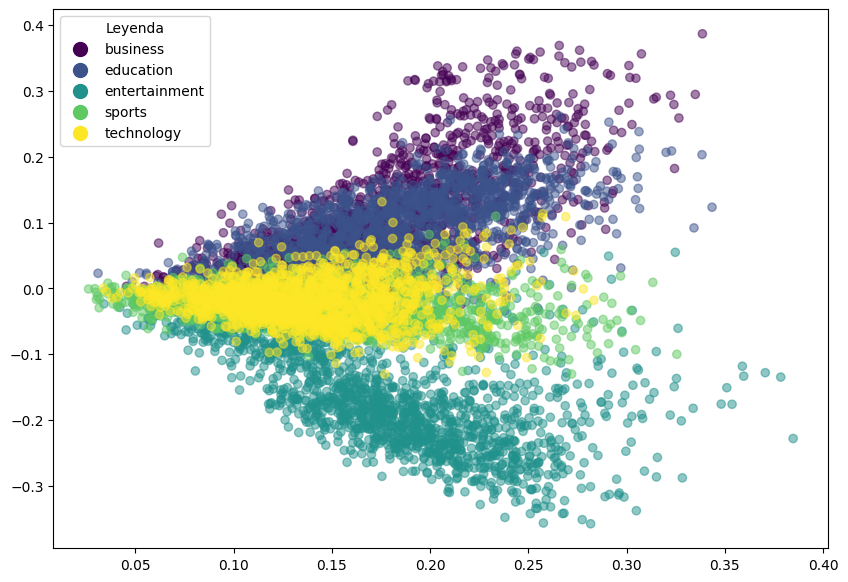

In [73]:
draw_components(unique_labels, tfidf_df, Y_train, 2)

(8000, 20)
Varianza explicada:  0.09793489887718093


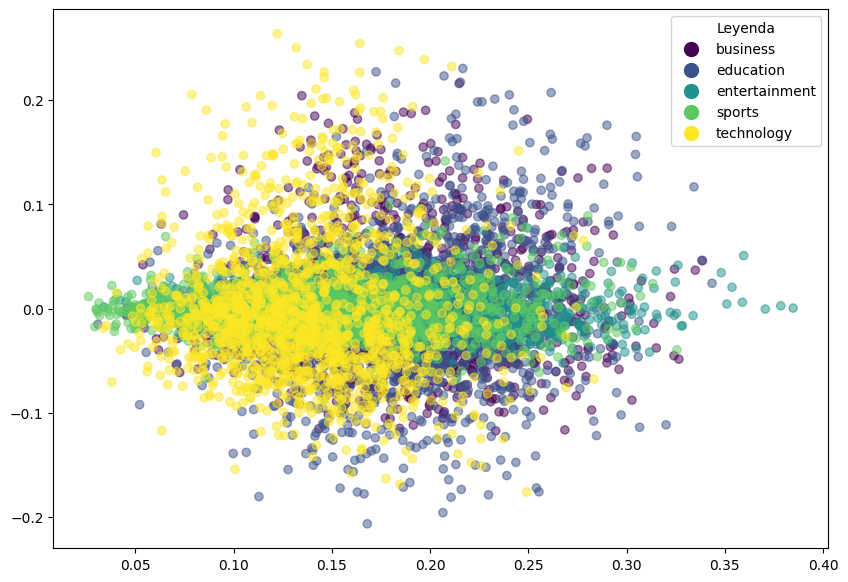

In [74]:
draw_components(unique_labels, tfidf_df, Y_train, 20)

(8000, 100)
Varianza explicada:  0.2087917726315192


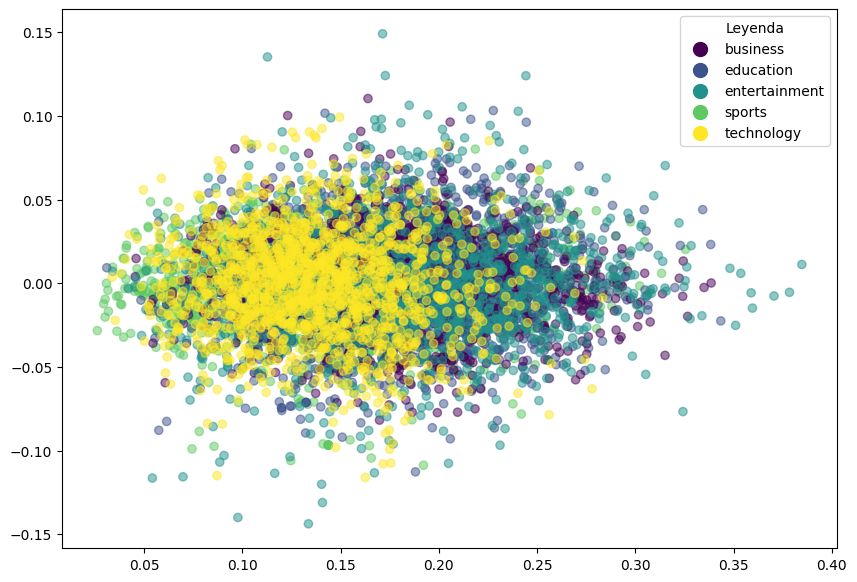

In [57]:
draw_components(unique_labels, tfidf_df, Y_train, 100)

(8000, 1000)
Varianza explicada:  0.5718193261774015


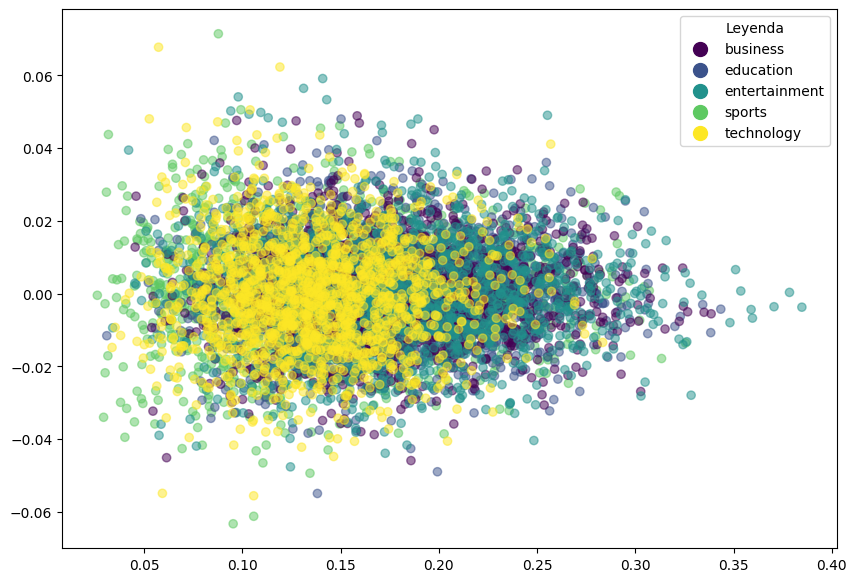

In [58]:
draw_components(unique_labels, tfidf_df, Y_train, 1000)

(8000, 8000)
Varianza explicada:  1.0000000000000056


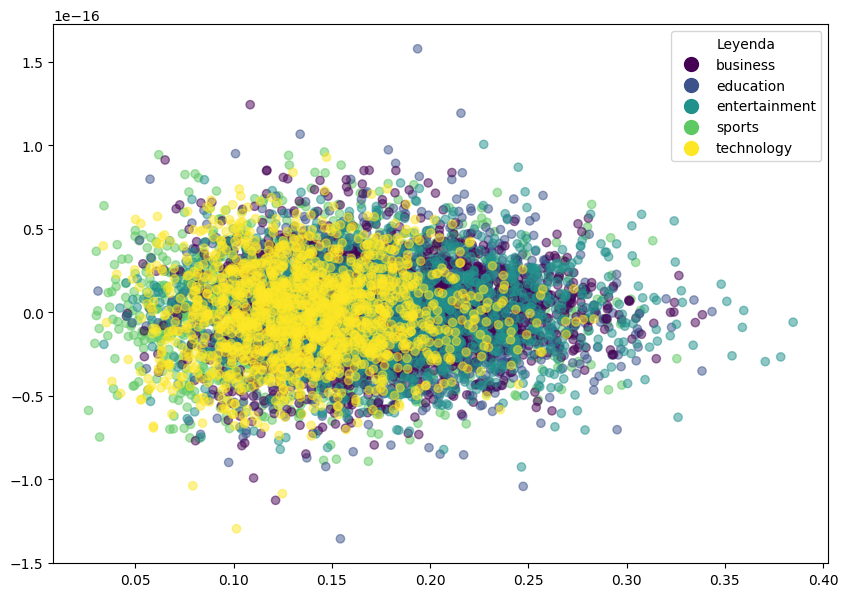

In [37]:
draw_components(unique_labels, tfidf_df, Y_train, 8000)

Como se puede observar, al sacar 8000 componentes principales, la varianza explicada por todos los componentes obtenidos es del 100%, como la idea es reducir al máximo el número de componentes principales se está intentando encontrar el mínimo número de componentes principales que permitirá tener por lo menos un 95% de la variabilidad explicada.

Dicho eso, es claro que se puede disminuir un poco más el número de componentes principales.

(8000, 6000)
Varianza explicada:  0.9742005013190539


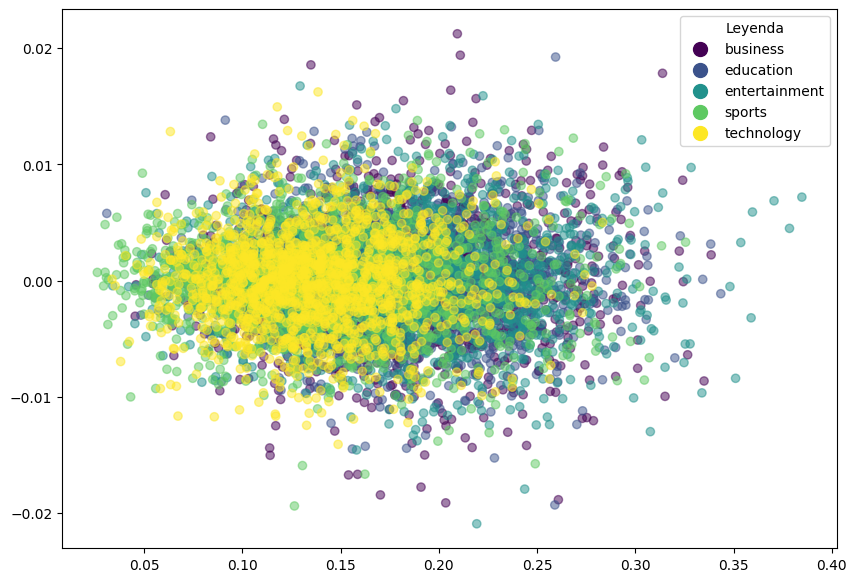

In [75]:
draw_components(unique_labels, tfidf_df, Y_train, 6000)

Ya se redujo en 2000 componentes y todavía se explica el 97% de la variabilidad, es decir que todavía se puede reducir un poco más.

(8000, 5000)
Varianza explicada:  0.945928984592642


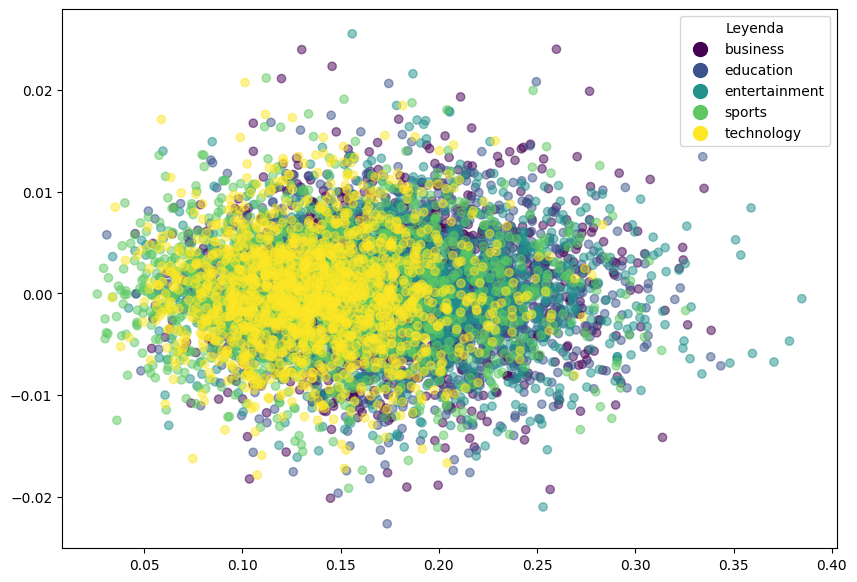

In [76]:
draw_components(unique_labels, tfidf_df, Y_train, 5000)

Parece ser que la explicación de la varianza está muy cerca del 95%, sin embargo como está por debajo hay que aumentar ligeramente la cantidad de componentes principales.

(8000, 5100)
Varianza explicada:  0.9493399646059367


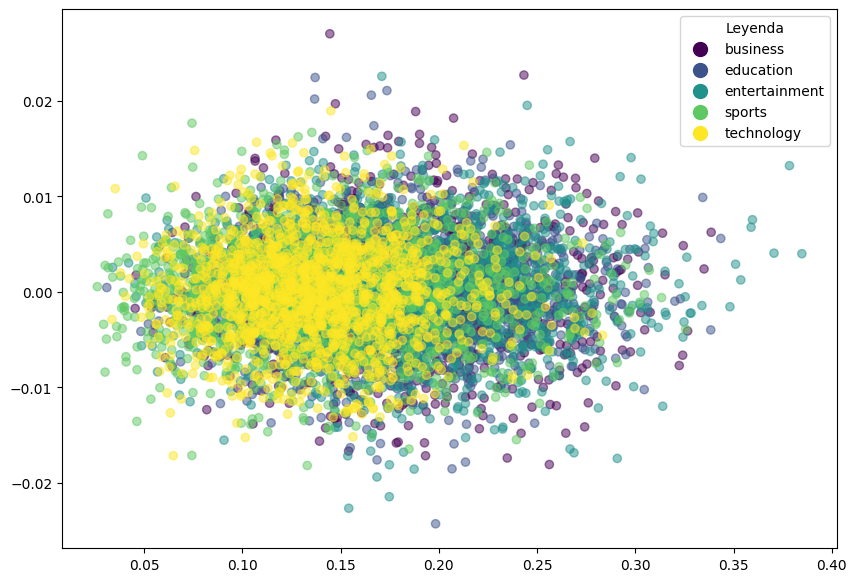

In [77]:
draw_components(unique_labels, tfidf_df, Y_train, 5100)

(8000, 1500)
Varianza explicada:  0.6687133333510444


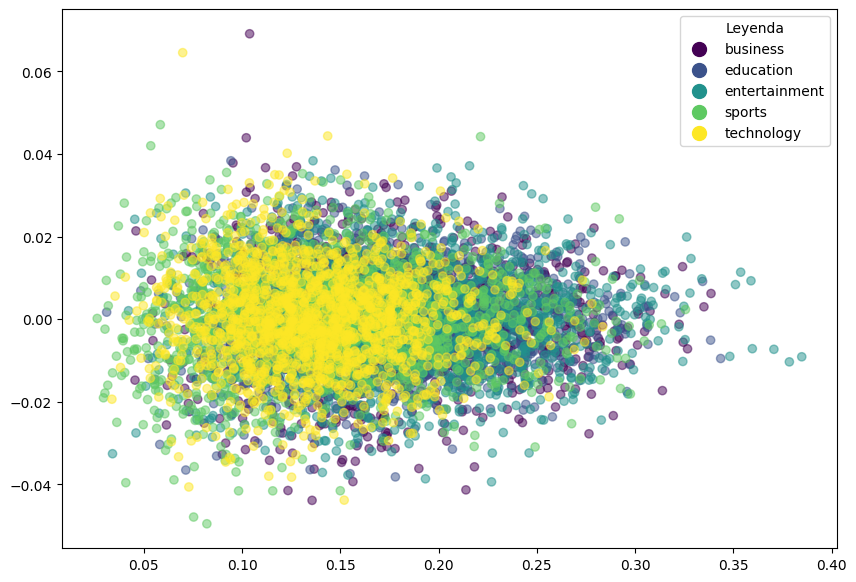

In [204]:
draw_components(unique_labels, tfidf_df, Y_train, 1500)

#### Tabla de resultados

| Cantidad de Componentes Principales | Explicabilidad de Varianza |
|-------------------------------------|-----------------------------|
| 2                                   | 1.6%                        |
| 20                                  | 9.8%                        |
| 100                                 | 20.9%                       |
| 1000                                | 57.2%                       |
| 5000                                | 94.6%                       |
| **5100**                            | **94.9%**                   |
| 6000                                | 97.4%                       |
| 8000                                | 100%                        |


Luego de revisar los resultados de la tabla, existe un número de componentes principales que está lo suficientemente cercano al límite impuesto, así que se ha encontrado el número ideal de componentes principales: `5100`

# 3. Modelamiento

In [206]:
!jupyter contrib nbextension install --user


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Scripts\jupyter-contrib.EXE\__main__.py", line 7, in <module>
  File "C:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\jupyter_core\application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\traitlets\config\application.py", line 1073, in launch_instance
    app = cls.instance(**kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\traitlets\config\configurable.py", line 583, in instance
    inst = cls(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\jupyter_contrib_core\application.py", line 27, in __init__
    self

## 3.1. Preparación de los datos

A continuación se creará la clase que contendrá todos los preprocesamientos necesarios.

**Importante:** El código implementado abajo realiza un proceso de preprocesamiento de texto seguido de una transformación TF-IDF y una reducción de dimensionalidad mediante PCA para preparar los datos para su alimentación a una red neuronal. 

Para garantizar la *consistencia* en la dimensionalidad de entrada de la red neuronal, se utiliza la técnica de padding con ceros, lo que asegura que todas las muestras tengan la misma dimensión, independientemente del tamaño del conjunto de datos (Como pasa en el caso de el conjunto de test). Esta decisión se justifica tanto por la necesidad de mantener la coherencia en los datos durante el entrenamiento de la red como por la arquitectura de la red neuronal, que requiere una dimensión de entrada uniforme para un procesamiento eficiente. Esto asegura que la red pueda entrenarse de manera efectiva y que los datos se procesen de manera uniforme, lo que contribuye a un mejor rendimiento del modelo.

In [120]:
class TextPreprocessing():
    def __init__(self,stopwords=stopwords.words('english')):
        self.stopwords = stopwords
        self.max_words = 10000
        self.n_components = 5100

    def remove_non_ascii(self, words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(self, words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in self.stopwords:
                new_words.append(word)
        return new_words

    def stem_words(self, words):
        """Stem words in list of tokenized words"""
        stemmer = SnowballStemmer('spanish')
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(self, words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def stem_and_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    def preproccesing(self, words):
        words = self.to_lowercase(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)
        words = self.remove_stopwords(words)
        return words

    def transform(self,X):
        X_train_new = pd.Series(X)
        X_train_new = X_train_new.apply(contractions.fix)
        X_train_new = X_train_new.apply(word_tokenize)
        X_train_new = X_train_new.apply(lambda x: self.preproccesing(x))
        #X_train_new = X_train_new.apply(lambda x: self.stem_and_lemmatize(x))
        X_train_new = X_train_new.apply(lambda x: self.stem_words(x))
        X_train_new = X_train_new.apply(lambda x: ' '.join(map(str, x)))
        tfidf_vect = TfidfVectorizer(max_features=self.max_words)
        X_tfidf = tfidf_vect.fit_transform(X_train_new)
        print(X_tfidf.shape[1])
        pca = TruncatedSVD(n_components=5100)
        X_pca = pca.fit_transform(X_tfidf)
        print('cd?',X_pca.shape[1])
        if X_pca.shape[1] < self.n_components:
            padding = np.zeros((X_pca.shape[0], self.n_components - X_pca.shape[1]))
            X_pca = np.hstack((X_pca, padding))

        print('cd?',X_pca.shape[1])
        return X_pca

Luego de construir la clase se creará la variable del pipeline.

In [121]:
pipeline = TextPreprocessing()

Se aplica ahora el pipeline a la variable X_train y al X_test

In [123]:
X_train_p = pipeline.transform(X_train)
print(f"El tamaño es: {X_train_p.shape}")
X_train_p

10000
cd? 5100
cd? 5100
El tamaño es: (8000, 5100)


array([[ 2.33922080e-01,  1.31247688e-01,  1.29150591e-01, ...,
         7.51390918e-03,  2.46480899e-03, -4.48837844e-04],
       [ 1.40489678e-01,  1.11609326e-01,  7.81257806e-02, ...,
         1.83829321e-04, -4.51272582e-04, -2.32915727e-03],
       [ 1.46370307e-01,  7.62418548e-02,  1.33796469e-02, ...,
         2.57103621e-03, -7.36388675e-04, -4.73893657e-03],
       ...,
       [ 1.42712216e-01, -7.78335298e-02,  8.81215183e-03, ...,
        -4.29223275e-03,  4.70130886e-03,  1.56996234e-04],
       [ 1.72146162e-01,  2.30874242e-02, -6.91681604e-02, ...,
         9.40396889e-03, -8.18349087e-03,  6.98168184e-03],
       [ 8.74686615e-02, -6.41265008e-03, -2.18219202e-02, ...,
        -2.88047749e-03, -1.14517864e-03,  5.37749740e-04]])

In [122]:
X_test_p = pipeline.transform(X_test)
print(f"El tamaño es: {X_test_p.shape}")
X_test_p

10000
cd? 2000
cd? 5100
El tamaño es: (2000, 5100)


array([[ 0.30477172,  0.6166607 , -0.1969735 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1651303 ,  0.05916292,  0.00324018, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20353653,  0.16461957, -0.12324496, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.14854384, -0.03417526,  0.00458536, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09985217, -0.01163311,  0.00729963, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.140651  , -0.00950192,  0.03118591, ...,  0.        ,
         0.        ,  0.        ]])

## 3.2. Arquitectura de la red

A continuación se va a construir la red neuronal, la cual va a contar con una capa de entrada, una capa oculta y una capa de salida.

In [124]:
model = Sequential(name="Base_NN")

#### Capa de entrada

In [125]:
model.add(Dense(128, activation='relu', input_shape=(X_train_p.shape[1],), name="Input_Layer"))
model.summary()

c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Base_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 128)            │       652,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,928 (2.49 MB)

 Trainable params: 652,928 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

#### Capa oculta

In [126]:
model.add(Dense(64, activation='relu', name="Hidden_Layer"))
model.summary()

Model: "Base_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 128)            │       652,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer (Dense)            │ (None, 64)             │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661,184 (2.52 MB)

 Trainable params: 661,184 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

#### Capa de Salida


In [127]:
model.add(Dense(len(unique_labels), activation="softmax", name='Output_Layer'))
model.summary()

Model: "Base_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 128)            │       652,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661,509 (2.52 MB)

 Trainable params: 661,509 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

#### Demás configuraciones


Finalmente, se configuran las opciones de entrenamiento resantes. Se especifica el optimizador Adam para la actualización de los pesos del modelo durante el entrenamiento, la función de pérdida de entropía cruzada categórica dispersa para calcular la discrepancia entre las predicciones y las etiquetas verdaderas, y la métrica de precisión para evaluar el rendimiento del modelo.

In [128]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "Base_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 128)            │       652,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661,509 (2.52 MB)

 Trainable params: 661,509 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

Una vez configurada toda la red neuronal es posible visualizarla

In [129]:

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## 3.3 Entrenamiento

### 3.3.1. Red neuronal Base

In [130]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [131]:
with tf.device('/device:GPU:0'):
  history = model.fit(X_train_p, Y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/100
200/200 - 1s - 7ms/step - accuracy: 0.8597 - loss: 0.7085 - val_accuracy: 0.0000e+00 - val_loss: 6.6077
Epoch 2/100
200/200 - 0s - 2ms/step - accuracy: 0.9992 - loss: 0.0114 - val_accuracy: 0.0000e+00 - val_loss: 7.4789
Epoch 3/100
200/200 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.0000e+00 - val_loss: 7.7802
Epoch 4/100
200/200 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.0000e+00 - val_loss: 8.0498
Epoch 5/100
200/200 - 0s - 2ms/step - accuracy: 1.0000 - loss: 7.8322e-04 - val_accuracy: 0.0000e+00 - val_loss: 8.2592
Epoch 6/100
200/200 - 0s - 2ms/step - accuracy: 1.0000 - loss: 5.2835e-04 - val_accuracy: 0.0000e+00 - val_loss: 8.4279
Epoch 7/100
200/200 - 0s - 2ms/step - accuracy: 1.0000 - loss: 3.7839e-04 - val_accuracy: 0.0000e+00 - val_loss: 8.5764
Epoch 8/100
200/200 - 0s - 2ms/step - accuracy: 1.0000 - loss: 2.8230e-04 - val_accuracy: 0.0000e+00 - val_loss: 8.6823
Epoch 9/100
200/200 - 0s - 2ms/step - accuracy: 1.0000 -

Ahora que el modelo ha terminado de entrenarse es necesario visualizar el comportamiento de la red neuronal. En específico se graficará el valor de pérdida del modelo.

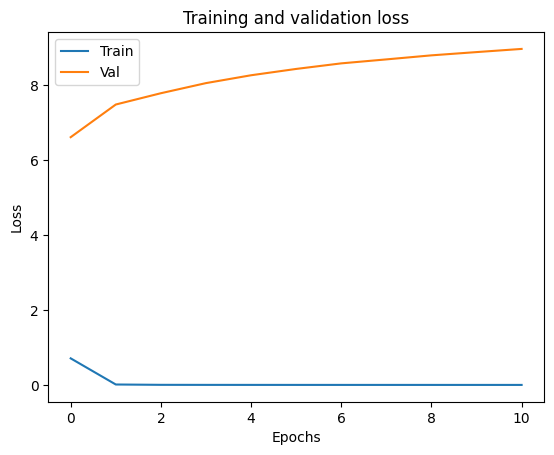

In [132]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

También se graficará el accuracy del modelo.

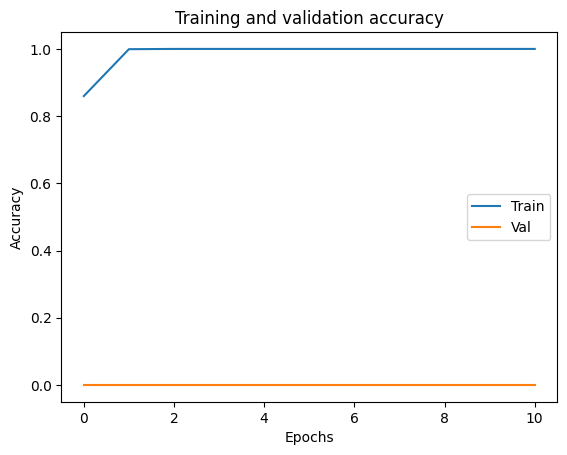

In [133]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Tras obtener las gráficas de accuracy y de loss es posible observar que hay un sobreajuste bastante importante entre el train y el validate. Por como se comporta el modelo usando el set de entrenamiento es claro que la red neuronal es demasiado compleja y se "aprende" los datos. Los resultados del entrenamiento muestran una marcada discrepancia entre la precisión y la pérdida en los conjuntos de entrenamiento y validación. Aunque el modelo logra una precisión cercana al 100% en el conjunto de entrenamiento, este rendimiento no se traduce en una generalización efectiva, como lo demuestra una precisión de 0% en el conjunto de validación. La alta pérdida en el conjunto de validación confirma la falta de generalización del modelo. 

Aunque la detención temprana del entrenamiento en la undécima época indica un intento de mitigar el sobreajuste, los resultados sugieren la necesidad de abordar más eficazmente este problema mediante estrategias adicionales, como la regularización, para mejorar la capacidad de generalización del modelo. Esto significa que para mejorar las métricas es necesario buscar hiperparámetros que ayuden a simplificar la red neuronal o que cambien el comportamiento y método de decisión de la red neuronal.

#### Métricas para conjunto test

In [134]:
model_accuracy = model.evaluate(X_test_p, Y_test)
print("Model Accuracy:", model_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3133 - loss: 2.7989
Model Accuracy: [3.4156370162963867, 0.3034999966621399]


In [152]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


[1 3 1 ... 1 3 1]
              precision    recall  f1-score   support

           0       0.28      0.38      0.33       400
           1       0.02      0.01      0.02       400
           2       0.31      0.46      0.37       400
           3       0.54      0.66      0.59       400
           4       0.00      0.00      0.00       400

    accuracy                           0.30      2000
   macro avg       0.23      0.30      0.26      2000
weighted avg       0.23      0.30      0.26      2000

Confusion matrix, without normalization


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

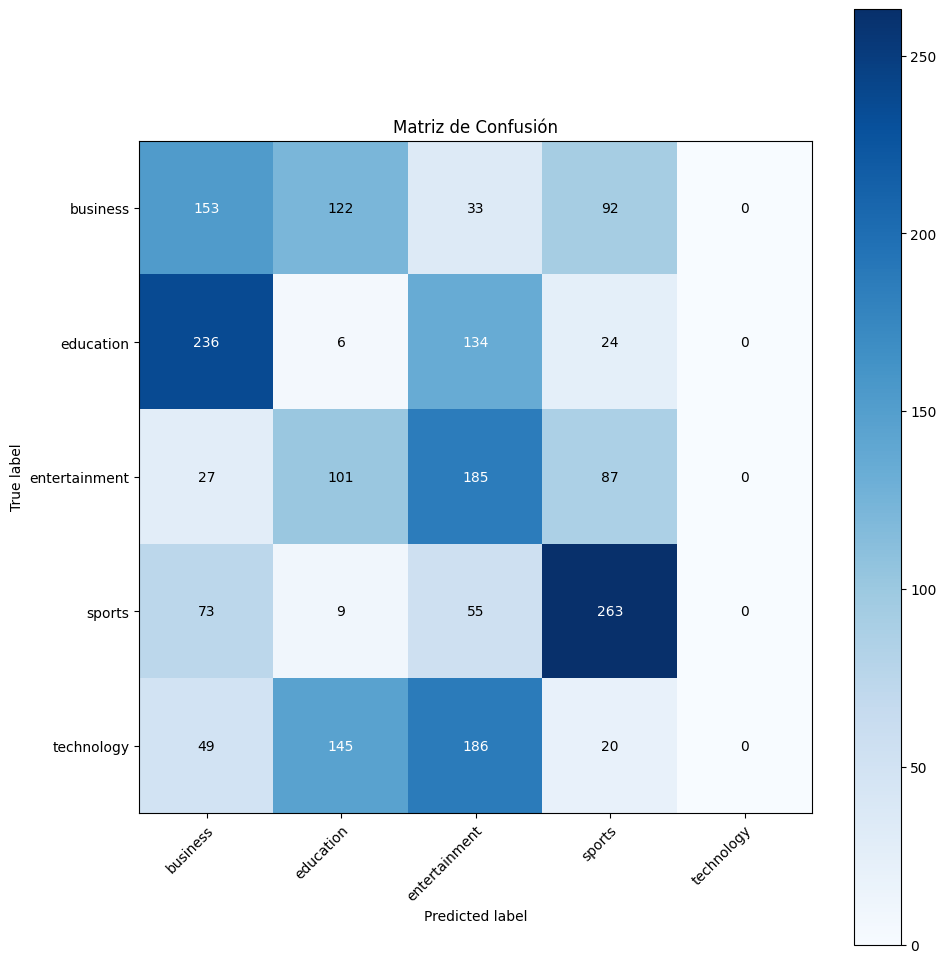

In [200]:
#import classification report
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test_p)
# Encuentra el índice del valor máximo en cada fila
clases_predichas = np.argmax(Y_pred, axis=1)

print(clases_predichas)
print(classification_report(Y_test, clases_predichas))
plot_confusion_matrix(y_true=Y_test, y_pred=clases_predichas, classes=unique_labels, normalize=False,
                      title='Matriz de Confusión')

Nuevamente es posible evidenciar el sobreajuste del modelo y la incapacidad de clasificar los datos como de tipo `technology`.

### 3.3.2. Búsqueda de hiperparámetros

Ahora que se cuenta con el algoritmo base de la red neuronal, el enfoque se dirige hacia la optimización de su rendimiento a través de una búsqueda de hiperparámetros. Se ha observado que la red neuronal puede no generalizar adecuadamente para datos desconocidos, lo que sugiere que hay margen para mejorar su capacidad de clasificación y sobre todo reducir su complejidad. En esta fase de optimización, se explorará el tipo de optimizador a utilizar, la cantidad de neuronas en la capa oculta y los métodos de activación de la capa de entrada y oculta. La elección del optimizador es crucial ya que determina cómo se actualizan los pesos de la red durante el entrenamiento, lo que puede influir significativamente en la convergencia y la calidad de los resultados. Del mismo modo, la cantidad de neuronas en la capa oculta influye en la capacidad de la red para aprender representaciones más complejas y no lineales de los datos; como se vió a través de las gráficas de validación y de entrenamiento puede que sea recomendable reducir el número de neuronas presente en la capa oculta.

In [210]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define la función para crear tu modelo
def create_model(optimizer='adam', units=128, activation='relu'):
    model = Sequential(name="Hyp_NN")
    model.add(Dense(128, activation=activation, input_shape=(X_train_p.shape[1],), name="Input_Layer"))
    model.add(Dense(units=units, activation=activation, name="Hidden_Layer"))
    model.add(Dense(len(unique_labels), activation='softmax', name='Output_Layer'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Crea el clasificador Keras para utilizarlo con GridSearchCV
keras_classifier = KerasClassifier(build_fn=create_model, batch_size=20, verbose=1)
# Llaves del keras classifier
print(keras_classifier.get_params().keys())
# Define los hiperparámetros que deseas buscar
param_dist = {
    'optimizer': ['adam', 'rmsprop', 'sgd', 'adagrad'],
    'model__activation': ['relu', 'sigmoid'],  # Cambié 'activation' de 'act'
    'model__units': [16, 32, 64, 128]
}

# Realiza la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_dist, cv=3)

grid_result = grid_search.fit(X_train_p, Y_train)





dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5382 - loss: 1.3232
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6638 - loss: 1.3135
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5222 - loss: 1.3467
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5250 - loss: 1.3449
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6780 - loss: 1.3249
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6574 - loss: 1.3115
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5631 - loss: 1.3348
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6753 - loss: 1.3003
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5904 - loss: 1.3382
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6084 - loss: 1.3198
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6372 - loss: 1.3230
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5339 - loss: 1.3516
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6523 - loss: 1.2590
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6357 - loss: 1.2705
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6551 - loss: 1.2542
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6808 - loss: 1.2613
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6695 - loss: 1.2708
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6525 - loss: 1.2601
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6293 - loss: 1.2866
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6449 - loss: 1.2746
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5575 - loss: 1.2992
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6618 - loss: 1.2582
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6507 - loss: 1.2526
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6912 - loss: 1.2593
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6751 - loss: 1.1941
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5610 - loss: 1.2245
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6358 - loss: 1.1856
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6607 - loss: 1.2013
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6535 - loss: 1.2102
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5549 - loss: 1.2229
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6720 - loss: 1.2019
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6768 - loss: 1.2072
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6203 - loss: 1.2176
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6640 - loss: 1.2027
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6636 - loss: 1.2127
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6292 - loss: 1.1921
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6282 - loss: 1.1624
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6639 - loss: 1.1431
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6291 - loss: 1.1564
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6866 - loss: 1.1513
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6454 - loss: 1.1512
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6309 - loss: 1.1611
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6282 - loss: 1.1549
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6565 - loss: 1.1358
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6563 - loss: 1.1591
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6374 - loss: 1.1564
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6069 - loss: 1.1550
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6787 - loss: 1.1475
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2244 - loss: 1.6414
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2112 - loss: 1.6470
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2251 - loss: 1.6729
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2375 - loss: 1.6217
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2272 - loss: 1.6143
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2147 - loss: 1.6404
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2258 - loss: 1.6133
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2489 - loss: 1.6214
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2402 - loss: 1.6123
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2049 - loss: 1.6681
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2200 - loss: 1.6496
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2216 - loss: 1.6882
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2369 - loss: 1.6428
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2189 - loss: 1.6191
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2113 - loss: 1.6462
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2261 - loss: 1.6341
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2290 - loss: 1.6259
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2114 - loss: 1.6299
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2294 - loss: 1.6332
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2204 - loss: 1.6548
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2280 - loss: 1.6202
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2229 - loss: 1.6268
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2110 - loss: 1.6512
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2209 - loss: 1.6165
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2117 - loss: 1.6452
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2280 - loss: 1.6259
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2113 - loss: 1.6150
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2157 - loss: 1.6142
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2129 - loss: 1.6208
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2039 - loss: 1.6239
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2171 - loss: 1.6265
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2289 - loss: 1.6159
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2121 - loss: 1.6148
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2039 - loss: 1.6535
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2107 - loss: 1.6226
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2231 - loss: 1.6433
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2170 - loss: 1.6323
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2104 - loss: 1.6207
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2089 - loss: 1.6379
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2070 - loss: 1.6239
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2099 - loss: 1.6500
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2098 - loss: 1.6251
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2078 - loss: 1.6365
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2063 - loss: 1.6428
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2232 - loss: 1.6236
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2234 - loss: 1.6232
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2126 - loss: 1.6280
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2232 - loss: 1.6318
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7612 - loss: 0.9999
Mejor precisión obtenida: 97.91%
Mejores hiperparámetros encontrados: {'model__activation': 'relu', 'model__units': 64, 'optimizer': 'rmsprop'}


A continuación se mostrarán los hiperparámetros seleccionados a través del GridSearch:

In [214]:
# Muestra los resultados
print("Mejor precisión obtenida: {:.2f}%".format(grid_result.best_score_ * 100))
print("Mejores hiperparámetros encontrados:", grid_result.best_params_)

Mejor precisión obtenida: 97.91%
Mejores hiperparámetros encontrados: {'model__activation': 'relu', 'model__units': 64, 'optimizer': 'rmsprop'}


Ahora se revisarán nuevamente las métricas para el conjunto test.

In [211]:
# Get the best parameters
best_params = grid_result.best_params_

# Create a new model using the best parameters
best_model = create_model(optimizer=best_params['optimizer'], units=best_params['model__units'], activation=best_params['model__activation'])

# Train the best model on the entire training dataset
best_model.fit(X_train_p, Y_train, batch_size=20, epochs=50, verbose=1)


Epoch 1/50


c:\Users\user\BI-Sabroson\Machine-Learning-Labs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7373 - loss: 1.0316
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9978 - loss: 0.0127
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0014
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 0.0010
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.9235e-05
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.4550e-05
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.1256e-05
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.2507e-05
Epoch 9/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.4336e-05
Epoch 10/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.8376e-05
Epoch 11/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.5272e-05
Epoch 12/50
400/400 ━━━━━━━━━━━━━━━

In [212]:
model_accuracy_t = best_model.evaluate(X_test_p, Y_test)
print("Model Accuracy:", model_accuracy_t)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2810 - loss: 8.0350
Model Accuracy: [7.567224502563477, 0.33899998664855957]


 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[1 4 4 ... 2 4 2]
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       400
           1       0.01      0.01      0.01       400
           2       0.35      0.50      0.41       400
           3       0.63      0.75      0.68       400
           4       0.18      0.15      0.17       400

    accuracy                           0.34      2000
   macro avg       0.30      0.34      0.31      2000
weighted avg       0.30      0.34      0.31      2000

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

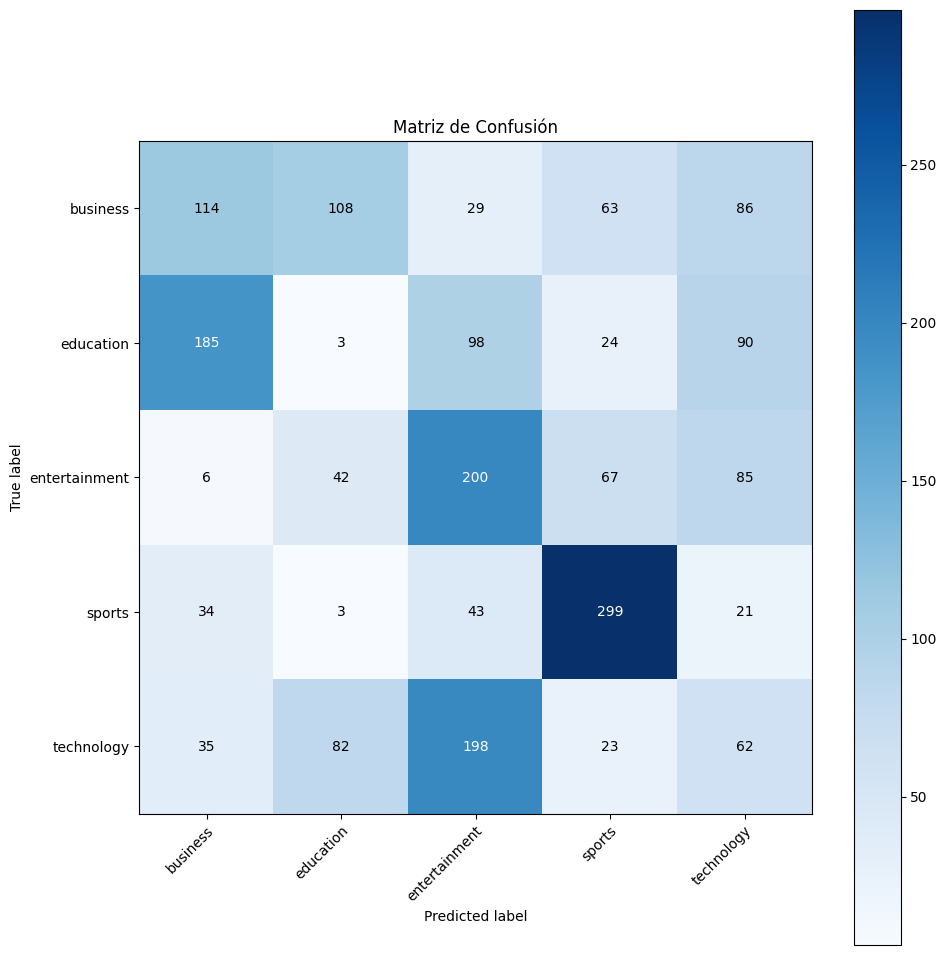

In [213]:
Y_pred_hyp = best_model.predict(X_test_p)
# Encuentra el índice del valor máximo en cada fila
clases_predichas = np.argmax(Y_pred_hyp, axis=1)

print(clases_predichas)
print(classification_report(Y_test, clases_predichas))
plot_confusion_matrix(y_true=Y_test, y_pred=clases_predichas, classes=unique_labels, normalize=False,
                      title='Matriz de Confusión')

Luego de la búsqueda de hiperparámetros se encontró que las métricas han mejorado un poco con respecto al algoritmo base. Si bien la diferencia no es tan significativa si lo es en términos de resultados, ya el modelo se atreve a predecir para todas las categorías.

Por ejemplo, ahora es capaz de identificar que es y no es de la categoría de deportes, aunque sigue cometiendo errores entre educación y negocios. También parece clasificar en entretenimiento muchas de los registros de la clase tecnología en entretenimiento.

# 4. Resultados

Tras la búsqueda de hiperparámetros, se observó una mejora marginal en las métricas del modelo en comparación con el algoritmo base. Aunque la diferencia no es significativa en términos absolutos, los resultados indican un avance importante, ya que el modelo ahora puede predecir todas las categorías, especialmente deportes.

Sin embargo, persisten problemas de sobreajuste, lo que sugiere la necesidad de continuar explorando diferentes conjuntos de hiperparámetros para reducir este efecto. Al revisar la nube de palabras, se identificó que ciertos términos comunes en todas las categorías, como nombres de redes sociales y verbos en pasado, podrían estar contribuyendo al sobreajuste al crear los vectores. Esta falta de distinción entre categorías puede ser la razón subyacente de las confusiones del modelo, especialmente entre las clases de educación y negocios.

Por otro lado, la categoría de deportes parece ser más distintiva, lo que permite al modelo clasificarla con mayor precisión. Esta observación destaca la importancia de tener características distintivas para cada clase a fin de mejorar la capacidad de generalización del modelo.

Como próximos pasos, se sugiere explorar la reducción del número de componentes en el modelo. Aunque esto podría disminuir la explicación de la varianza, también podría ayudar a eliminar el ruido en los datos y mejorar la capacidad del modelo para generalizar correctamente.
